# EDA

Importando librerias que necesitaremos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
import seaborn as sns
sns.set()

Lectura  del csv

In [2]:
df=pd.read_csv(r'movies_dataset_final.csv')

C:\Users\magna\AppData\Local\Temp\ipykernel_3024\3240767142.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'movies_dataset_final.csv')


Eliminamos duplicados , reiniciamos el index y mostramos el dataframe

In [3]:
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['id'],inplace=True)
df=df.reset_index(drop=True)

In [4]:
df.head()

belongs_to_collection      budget  \
0            ['Toy Story Collection']  30000000.0   
1                                 NaN  65000000.0   
2       ['Grumpy Old Men Collection']         0.0   
3                                 NaN  16000000.0   
4  ['Father of the Bride Collection']         0.0   

                               genres     id original_language  \
0   ['Animation', 'Comedy', 'Family']    862                en   
1  ['Adventure', 'Fantasy', 'Family']   8844                en   
2               ['Romance', 'Comedy']  15602                en   
3      ['Comedy', 'Drama', 'Romance']  31357                en   
4                          ['Comedy']  11862                en   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  When siblings Judy and Peter discover an encha...  17.015539   
2  A family wedding reignites the ancient feud be...    11.7129   
3  Cheated on, mistreated and stepped on, the wom...   3.859495   
4  Just when George Banks has recovered from his ...   8.387519   

                                production_companies  \
0                        ['Pixar Animation Studios']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                 ['Warner Bros.', 'Lancaster Gate']   
3         ['Twentieth Century Fox Film Corporation']   
4   ['Sandollar Productions', 'Touchstone Pictures']   

       production_countries release_date  ...  \
0  United States of America   1995-10-30  ...   
1  United States of America   1995-12-15  ...   
2  United States of America   1995-12-22  ...   
3  United States of America   1995-12-22  ...   
4  United States of America   1995-02-10  ...   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title vote_average vote_count release_year  \
0                    Toy Story          7.7     5415.0         1995   
1                      Jumanji          6.9     2413.0         1995   
2             Grumpier Old Men          6.5       92.0         1995   
3            Waiting to Exhale          6.1       34.0         1995   
4  Father of the Bride Part II          5.7      173.0         1995   

      return  release_month  release_day  \
0  12.451801        October       Monday   
1   4.043035       December       Friday   
2   0.000000       December       Friday   
3   5.090760       December       Friday   
4   0.000000       February       Friday   

                                                cast         director  
0  ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...    John Lasseter  
1  ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...     Joe Johnston  
2  ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...    Howard Deutch  
3  ['Whitney Houston', 'Angela Bassett', 'Loretta...  Forest Whitaker  
4  ['Steve Martin', 'Diane Keaton', 'Martin Short...    Charles Shyer  

[5 rows x 24 columns]

Obtenemos informacion de las columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45349 entries, 0 to 45348
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45346 non-null  float64
 2   genres                 45349 non-null  object 
 3   id                     45349 non-null  object 
 4   original_language      45338 non-null  object 
 5   overview               44403 non-null  object 
 6   popularity             45347 non-null  object 
 7   production_companies   45349 non-null  object 
 8   production_countries   39137 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45349 non-null  float64
 11  runtime                45100 non-null  float64
 12  spoken_languages       45346 non-null  object 
 13  status                 45266 non-null  object 
 14  tagline                20386 non-null  object 
 15  ti

Cuenta de valores nulos

In [6]:
df.isna().sum().sort_values(ascending = False)

belongs_to_collection    40861
tagline                  24963
production_countries      6212
overview                   946
director                   875
runtime                    249
status                      83
original_language           11
release_day                  3
release_month                3
vote_count                   3
vote_average                 3
title                        3
spoken_languages             3
budget                       3
release_date                 3
popularity                   2
revenue                      0
release_year                 0
return                       0
id                           0
production_companies         0
cast                         0
genres                       0
dtype: int64

Del siguiente analisis observe que la columna 'tagline' tiene valores faltantes y supongo que se debe a que no todas las peliculas tengan lineas memorables que la gente recuerde o tal vez falto informacion para esta columna de datos .
De todas formas voy a eliminar esta columna por que la veo innecesaria para el EDA que estoy realizando

In [7]:
df.drop(columns=['tagline'], inplace=True)

Revisamos valores faltantes

In [8]:
df[df.overview.isna()]

belongs_to_collection      budget                    genres      id  \
32                      NaN         0.0  ['Romance', 'Adventure']   78802   
300                     NaN  22000000.0       ['Drama', 'Comedy']  161495   
634                     NaN         0.0                ['Comedy']  287305   
635                     NaN         0.0                ['Comedy']  339428   
641                     NaN         0.0                ['Comedy']   10801   
...                     ...         ...                       ...     ...   
45226                   NaN         0.0              ['Thriller']  395767   
45227                   NaN         0.0                 ['Drama']  199887   
45262                   NaN         0.0             ['Adventure']  317389   
45283                   NaN   1254040.0     ['Romance', 'Comedy']  468707   
45284                   NaN    750000.0       ['Crime', 'Comedy']  280422   

      original_language overview popularity  \
32                   fr      NaN   0.745542   
300                  sv      NaN   3.395867   
634                  de      NaN   0.066123   
635                  de      NaN   0.002229   
641                  de      NaN   0.821299   
...                 ...      ...        ...   
45226                fr      NaN   1.238471   
45227                en      NaN   0.704642   
45262                es      NaN   0.006352   
45283                fi      NaN   0.347806   
45284                ru      NaN   0.201582   

                                    production_companies  \
32                              ['Iwerks Entertainment']   
300    ['Hollywood Pictures', 'Interscope Communicati...   
634                     ['Westdeutscher Rundfunk (WDR)']   
635                          ['Senator Film Produktion']   
641                                  ['Constantin Film']   
...                                                  ...   
45226                                ['2425 PRODUCTION']   
45227  ['Fox Television Studios', 'Universal Cable Pr...   
45262                  ['Roas Produzioni', 'Buton Film']   
45283                           ['Elokuvayhtiö Oy Aamu']   
45284        ['Кинокомпания «Lunapark»', 'Инвада фильм']   

                   production_countries release_date  ...    status  \
32     France, United States of America   1996-09-18  ...  Released   
300            United States of America   1995-03-01  ...  Released   
634                             Germany   1996-03-21  ...  Released   
635                             Germany   1996-03-14  ...  Released   
641                             Germany   1996-03-06  ...  Released   
...                                 ...          ...  ...       ...   
45226                   Belgium, France   2017-01-11  ...  Released   
45227          United States of America   2013-01-04  ...  Released   
45262                             Italy   1973-07-22  ...  Released   
45283                           Finland   2017-07-28  ...  Released   
45284                            Russia   2014-06-05  ...  Released   

                                  title vote_average vote_count release_year  \
32                     Wings of Courage          6.8        4.0         1996   
300                           Roommates          6.4        7.0         1995   
634      Peanuts – Die Bank zahlt alles          4.0        1.0         1996   
635                       Happy Weekend          0.0        0.0         1996   
641                       The Superwife          5.3        7.0         1996   
...                                 ...          ...        ...          ...   
45226                            Scribe          5.8       26.0         2017   
45227                        Over/Under          4.0        2.0         2013   
45262     Simbad e il califfo di Bagdad          0.0        0.0         1973   
45283  Thick Lashes of Lauri Mäntyvaara          8.0        1.0         2017   
45284                       All at Once          6.0        4.

Mucha informacion que falta podria deberse que no sean peliculas producidas en E.E.U.U. por lo que no es tan facil acceder a informacion sobre las mismas

Voy a ver cuantas peliculas pertenecen a esas francquicias

In [9]:
df[df['overview'].isna()]['belongs_to_collection'].notna().sum()

59

Exploramos los valores a profundidad

In [10]:
df[df['overview'].isna() & df['belongs_to_collection'].notna()]

belongs_to_collection      budget  \
5945                             ['Jönsson Gang']         0.0   
14118           ['Fuga de cerebros - Collection']         0.0   
17254              ['Vääpeli Körmy - Collection']         0.0   
17257              ['Vääpeli Körmy - Collection']         0.0   
17300              ['Vääpeli Körmy - Collection']         0.0   
17308          ['Pekko aikamiespoika Collection']         0.0   
17330              ['Vääpeli Körmy - Collection']         0.0   
17331              ['Vääpeli Körmy - Collection']         0.0   
22737           ['The Three Brothers Collection']  13640000.0   
24582                       ['Elling Collection']         0.0   
25464       ['Il Maresciallo Giraldi Collection']         0.0   
25468       ['Il Maresciallo Giraldi Collection']         0.0   
25636                                          []         0.0   
25860             ['I due carabinieri Collecion']         0.0   
26550         ['Heidi (Praesens-Film) Filmreihe']         0.0   
27647                    ['Sunes samtliga Resor']         0.0   
29400                     ['Mörderischer Norden']         0.0   
30142         ['Cetto La Qualunque - Collezione']   5579750.0   
30423                         ['Totò Collection']         0.0   
30427                         ['Totò Collection']         0.0   
30720        ['Il medico della mutua Collection']         0.0   
30775                            ['Il tassinaro']         0.0   
32013                     ['Fantozzi Collection']         0.0   
32016                     ['Fantozzi Collection']         0.0   
32020            ['Scuola di ladri - Collezione']         0.0   
33340                         ['Argo Collection']         0.0   
33442                         ['Totò Collection']         0.0   
34482           ['Regalo di Natale - Collezione']         0.0   
34537                         ['Totò Collection']         0.0   
34629        ['Алиса в стране чудес (Коллекция)']         0.0   
35247                          ['Uuno Turhapuro']         0.0   
35249                          ['Uuno Turhapuro']         0.0   
35250                          ['Uuno Turhapuro']         0.0   
35251                          ['Uuno Turhapuro']         0.0   
35252                          ['Uuno Turhapuro']         0.0   
35263                         ['Totò Collection']         0.0   
35265                         ['Totò Collection']         0.0   
35752              ['La Classe Américaine & Cie']         0.0   
36475                      ['Pitbull - Kolekcja']         0.0   
37078                     ['All Stars Collectie']         0.0   
37226               ['Father of Four Collection']         0.0   
37412    ['Die Kirche bleibt im Dorf Collection']         0.0   
38584                         ['Totò Collection']         0.0   
39270                      ['Big Man Collection']         0.0   
39271                      ['Big Man Collection']         0.0   
39572          ['Tognazzi & Vianello Collection']         0.0   
40075  ['Eccezzziunale... veramente Collections']         0.0   
41448                 ['Mandıra Filozofu Serisi']         0.0   
41449                 ['Düğün Dernek Collection']         0.0   
41450                        ['Sağ Salim Serisi']         0.0   
41684                     ['Krummerne (Samling)']         0.0   
42750                  ['Şevkat Yerimdar Serisi']         0.0   
43033             ['Aurélie Laflamme Collection']         0.0   
43178                     ['Fantozzi Collection']         0.0   
43241              ['I soliti idioti Collection']         0.0   
43375                 ['Eyyvah Eyvah Collection']         0.0   
44836                         ['Totò Collection']         0.0   
44849                         ['Totò Collection']         0.0   
44850                         ['Totò Collection']         0.0   

                                              genres      id  \
5945                                      ['Comedy']   29224   

Veo que 58 peliculas carecen de informacion por lo que veo poco util utilizarlos como recomendacion, en este caso voy a eliminar los valores NaN

In [11]:
df.dropna(subset=['overview'], inplace=True)

Reseteo del index despues del cambio

In [12]:
df=df.reset_index(drop=True)

Revisamos

In [13]:
df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

Vamos a visualizar los diferentes valores en la columna de año de lanzamiento para que pueda hacer coincidir esos valores con la columna de estado, ya que algunas películas en esa columna parecen estar ‘canceladas’, ‘nan’ u otro estado que sugiere que no están disponibles. Entonces, mi lógica es que si tiene un año de lanzamiento, entonces la columna de estado está desactualizada si dice algo que no sea ‘lanzado’ y el año de lanzamiento ya ha pasado. Quizás, la base de datos es la desactualizada pero, para el propósito de este proyecto, estoy asumiendo que la base de datos está actualizada. También estoy ordenando los valores para que sean más fáciles de interpretar.

In [14]:
np.sort(df.release_year.unique())

array([   0, 1874, 1878, 1883, 1887, 1888, 1890, 1891, 1892, 1893, 1894,
       1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2020], dtype=int64)

De esto, concluyo que la columna de estado está desactualizada ya que la columna de año de lanzamiento tiene valores nulos o años que no tienen sentido  Por esta razón no voy a usar la columna de estado en mi modelo y voy a eliminarla.

In [15]:
df.drop(columns=['status'],inplace=True)

Voy a usar en mi data un profilereport para explorar a mas profundidad mis datos 

In [16]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**ANALISIS EN BASE AL REPORTE**


Columna: 'budget' 
Observo que hay muchos valores en zero ya sea por falta de informacion o por que el propietario del dataset no tenia la informacion por lo tanto hizo cero la columna , de todos modos mantengo este columna por que la api consume la columna

Columna: 'original_language' 
Esta muy sesgada por lo que para mi recomendacion no la veria conveniente

In [17]:
df['popularity'].dtypes

dtype('O')

In [18]:
df.drop(columns=['original_language'], inplace=True)

columna: popularidad

La columna en teoria deberia tener solo numeros float pero encontramos str en ella , si reemplazamos por cero igual seguiriamos teniendo falta de informacion 

In [19]:
df.drop(columns=['popularity'],inplace=True)

Columna: 'revenue' 
Considero irrelevante esta columna por la cantidad de ceros que tiene , solo por temas de api la mantendre 

Columna: 'runtime'
En este caso veo peliculas que superan la media de duracion y esto se nota en la desviacion estandar de la misma columna , por profundizar deseo ver cuales deben ser esas peliculas 

In [20]:
df[df['runtime']>=500]

belongs_to_collection       budget  \
6715                    NaN          0.0   
9083                    NaN          0.0   
12877                   NaN          0.0   
13005                   NaN          0.0   
13710                   NaN          0.0   
13894                   NaN          0.0   
18491                   NaN          0.0   
19014                   NaN          0.0   
19804                   NaN          0.0   
20779                   NaN          0.0   
20790                   NaN          0.0   
23929                   NaN          0.0   
25687                   NaN          0.0   
26377                   NaN          0.0   
26486                   NaN          0.0   
27337                   NaN  120000000.0   
27534                   NaN          0.0   
30959                   NaN          0.0   
33831                   NaN    5000000.0   
34086                   NaN          0.0   
34130                   NaN          0.0   
34148                   NaN          0.0   
35411                   NaN          0.0   
36778                   NaN          0.0   
37714                   NaN   24000000.0   
38301                   NaN          0.0   
38302                   NaN          0.0   
40089                   NaN          0.0   
42250                   NaN  125000000.0   
43043                   NaN          0.0   
43174                   NaN          0.0   
43736                   NaN          0.0   

                                                  genres      id  \
6715                                     ['Documentary']   42044   
9083                            ['Documentary', 'Drama']   30983   
12877                               ['History', 'Drama']  118309   
13005                  ['Adventure', 'Drama', 'Western']   17800   
13710                                          ['Drama']   45560   
13894                               ['Drama', 'History']   67463   
18491                                    ['Documentary']   26397   
19014                  ['Documentary', 'History', 'War']  208988   
19804                                    ['Documentary']  142051   
20779                                                 []  194668   
20790                                    ['Documentary']   86282   
23929                               ['Drama', 'History']   67493   
25687                    ['Drama', 'History', 'Western']   18729   
26377                                ['Science Fiction']  150004   
26486                              ['Drama', 'TV Movie']  266314   
27337  ['Action', 'Adventure', 'Drama', 'History', 'W...  189197   
27534                                    ['Documentary']  125336   
30959                               ['Drama', 'History']  206514   
33831                    ['Drama', 'Mystery', 'Romance']   51129   
34086                         ['History', 'Documentary']  293603   
34130                         ['Documentary', 'History']  189215   
34148           ['Adventure', 'Drama', 'History', 'War']   38430   
35411                                                 []  377136   
36778                                    ['Documentary']   62241   
37714                        ['Drama', 'History', 'War']   75926   
38301                                    ['Documentary']  192040   
38302                                    ['Documentary']  220903   
40089                                    ['Documentary']  126820   
42250                         ['Action', 'Drama', 'War']  331214   
43043                                                 []  364150   
43174                                       ['TV Movie']  444623   
43736                                                 []  128733   

                                                overview  \
6715   Claude Lanzmann directed this 9 1/2 hour docum...   
9083   Tom Hanks, Imagine Entertainment and HBO prese...   
12877  The life of one of the USA's Founding Fathers,...   
13005  Steven Spielberg executive produced this TNT m...   
13710  B

In [21]:
df[df['runtime']>240].shape[0]

193

In [22]:
df[df['runtime']>240]['genres'].value_counts()

['Documentary']                      34
['Drama']                            20
[]                                   18
['Drama', 'History']                  8
['Drama', 'History', 'Romance']       4
                                     ..
['War', 'Documentary', 'History']     1
['Documentary', 'Adventure']          1
['Drama', 'Science Fiction']          1
['Drama', 'History', 'Western']       1
['Crime', 'Documentary', 'Drama']     1
Name: genres, Length: 90, dtype: int64

Parece que muchos de ellos son documentales, lo cual en realidad no es tan extraño. Además, noté que la mayoría de los valores mayores o iguales a 500 minutos no son películas sino miniseries, y esa cifra parece representar la duración agregada de todos sus episodios. Voy a eliminar las filas con duraciones mayores a 500 minutos solo para intentar mantener fuera tantas miniseries como sea posible de mi modelo. Sin embargo, voy a eliminar esta columna para mi modelo de ML, basándome en el hecho de que lo que estoy tratando de lograr con mi sistema de recomendación es que recomiende películas basadas puramente en su contenido y la duración simplemente no es tan relevante para este propósito.

In [23]:
df=df[df['runtime']<500]

In [24]:
df=df.reset_index(drop=True)

In [25]:
df.drop(columns=['runtime'],inplace=True)

Columna: 'vote_average'

Me parecio interesante en esta columna usar el siguiente histograma

<AxesSubplot: >

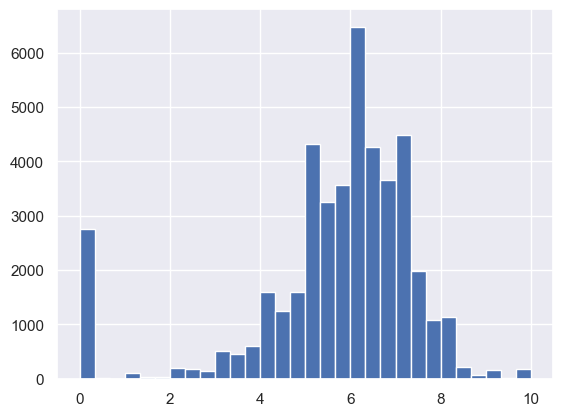

In [26]:
df['vote_average'].hist(bins=30)

In [27]:
df[df['vote_average']==0]

belongs_to_collection  budget                    genres      id  \
82                      NaN     0.0                        []  188588   
106                     NaN     0.0                 ['Crime']   96357   
125                     NaN     0.0                        []  290157   
131                     NaN     0.0  ['Music', 'Documentary']  124636   
136                     NaN     0.0                        []  124639   
...                     ...     ...                       ...     ...   
44335                   NaN     0.0           ['Documentary']  323132   
44337                   NaN     0.0                        []  325439   
44355                   NaN     0.0           ['Documentary']  276895   
44366                   NaN     0.0                        []  227506   
44367                   NaN     0.0                        []  461257   

                                                overview production_companies  \
82     Filmed entirely on location in East Hampton, L...                   []   
106    An ex-con holds a group of people hostage in a...                   []   
125    Michel Negroponte, a documentary filmmaker, me...                   []   
131    Within days after the release of Negativland's...                   []   
136     A subtle yet violent commentary on feudal lords.                   []   
...                                                  ...                  ...   
44335  This film records a 12 day ritual performed by...                   []   
44337  Young Aladdin (Donald O'Connor) has a series o...                   []   
44355  Deep Hearts is a film about the Bororo Fulani,...                   []   
44366  In a small town live two brothers, one a minis...        ['Yermoliev']   
44367  50 years after decriminalisation of homosexual...                   []   

           production_countries release_date  revenue  \
82                          NaN   1995-11-22      0.0   
106                         NaN   1995-05-20      0.0   
125                         NaN   1995-01-01      0.0   
131    United States of America   1995-08-01      0.0   
136                         NaN   1995-08-01      0.0   
...                         ...          ...      ...   
44335                       NaN   1976-01-01      0.0   
44337                       NaN   1961-10-31      0.0   
44355  United States of America   1981-01-01      0.0   
44366                    Russia   1917-10-21      0.0   
44367            United Kingdom   2017-06-09      0.0   

                                        spoken_languages  \
82                                                    []   
106                                                   []   
125                                                   []   
131             [{'iso_639_1': 'en', 'name': 'English'}]   
136                                                   []   
...                                                  ...   
44335           [{'iso_639_1': 'en', 'name': 'English'}]   
44337           [{'iso_639_1': 'en', 'name': 'English'}]   
44355  [{'iso_639_1': 'ff', 'name': 'Fulfulde'}, {'is...   
44366                                                 []   
44367           [{'iso_639_1': 'en', 'name': 'English'}]   

                              title  vote_average  vote_count  release_year  \
82      Last Summer in the Hamptons           0.0         0.0          1995   
106    Headless Body in Topless Bar           0.0         0.0          1995   
125                  Jupiter's Wife           0.0         0.0          1995   
131                   Sonic Outlaws           0.0         0.0          1995   
136                          Target           0.0         0.0          1995   
...                             ...           ...         ...           ...   
44335                 Altar of Fire           0.0         0.0          1976   
44337        The Wonders of Aladdin           0.0         0.0          1961   
44355                   Deep Hearts    

Hay muchos valores cero y no se si por que las peliculas son mala o por falta de informacion, de todos modos para mi sistema de recomendacion no veo eficiente dejar esta columna 

In [28]:
df.drop(columns=['vote_average'],inplace=True)

Columna: 'release_year'
Por temas de api debo mantener esta columna aun que noto anomalias en los datos

Columna: 'return'

Lo mismo para esta 

Columna: 'belongs_to_collection'

Tiene muchos valores faltantes pero por temas de la consigna del proyecto , voy a mentener

Mi dataframe final para la recomendacion

In [29]:
df.head()

belongs_to_collection      budget  \
0            ['Toy Story Collection']  30000000.0   
1                                 NaN  65000000.0   
2       ['Grumpy Old Men Collection']         0.0   
3                                 NaN  16000000.0   
4  ['Father of the Bride Collection']         0.0   

                               genres     id  \
0   ['Animation', 'Comedy', 'Family']    862   
1  ['Adventure', 'Fantasy', 'Family']   8844   
2               ['Romance', 'Comedy']  15602   
3      ['Comedy', 'Drama', 'Romance']  31357   
4                          ['Comedy']  11862   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                                production_companies  \
0                        ['Pixar Animation Studios']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                 ['Warner Bros.', 'Lancaster Gate']   
3         ['Twentieth Century Fox Film Corporation']   
4   ['Sandollar Productions', 'Touchstone Pictures']   

       production_countries release_date      revenue  \
0  United States of America   1995-10-30  373554033.0   
1  United States of America   1995-12-15  262797249.0   
2  United States of America   1995-12-22          0.0   
3  United States of America   1995-12-22   81452156.0   
4  United States of America   1995-02-10   76578911.0   

                                    spoken_languages  \
0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2           [{'iso_639_1': 'en', 'name': 'English'}]   
3           [{'iso_639_1': 'en', 'name': 'English'}]   
4           [{'iso_639_1': 'en', 'name': 'English'}]   

                         title  vote_count  release_year     return  \
0                    Toy Story      5415.0          1995  12.451801   
1                      Jumanji      2413.0          1995   4.043035   
2             Grumpier Old Men        92.0          1995   0.000000   
3            Waiting to Exhale        34.0          1995   5.090760   
4  Father of the Bride Part II       173.0          1995   0.000000   

  release_month release_day  \
0       October      Monday   
1      December      Friday   
2      December      Friday   
3      December      Friday   
4      February      Friday   

                                                cast         director  
0  ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...    John Lasseter  
1  ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...     Joe Johnston  
2  ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...    Howard Deutch  
3  ['Whitney Houston', 'Angela Bassett', 'Loretta...  Forest Whitaker  
4  ['Steve Martin', 'Diane Keaton', 'Martin Short...    Charles Shyer

Salvamos el dataframe en csv para el ML

In [30]:
df.to_csv('movies_dataset_ml.csv')